In [1]:
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
import pandas as pd
import duckdb

In [3]:
# Data Source 1
# CSV
# ms_hinds_locations = pd.read_csv("data/ms_hinds_locations.csv")
ms_hinds_locations = gpd.read_file("../data/ms_hinds_locations.csv")
print(ms_hinds_locations.columns)

ms_hinds_locations.head(2)

Index(['source', 'parcel_id', 'parcel_lat', 'parcel_lon',
       'parcel_building_footprint', 'parcel_building_count', 'poi_lat',
       'poi_lon', 'secondary_lat', 'secondary_lon', 'lob_addr1', 'lob_lat',
       'lob_lon', 'lob_zipcode', 'f_ziploc', 'f_lat', 'f_lon', 'f_city',
       'primary_loc_id', 'f_addr1', 'f_unit', 'geometry'],
      dtype='object')


,source,parcel_id,parcel_lat,parcel_lon,parcel_building_footprint,parcel_building_count,poi_lat,poi_lon,secondary_lat,secondary_lon,...,lob_lon,lob_zipcode,f_ziploc,f_lat,f_lon,f_city,primary_loc_id,f_addr1,f_unit,geometry
0,POI,None,nan,nan,None,None,32.364986,-90.145943,nan,nan,...,-90.14568,39211-5404,39211,32.365143,-90.14568,Jackson,4950@@OLD CANTON@RD@&&39211,4950 OLD CANTON RD,nan,None
1,POI,None,nan,nan,None,None,32.389834,-90.110479,nan,nan,...,-90.11048,39211-2441,39211,32.389835,-90.11048,Jackson,6300@@OLD CANTON@RD@&&39211,6300 OLD CANTON RD,nan,None


In [4]:
# Data Source 4
import zipfile
zf = zipfile.ZipFile("../data/ms_hinds_buildings.geojson.zip") 
# df = pd.read_csv(zf)
# dfcsv = gpd.read_file("data/ms_hinds_buildings.geojson/ms_hinds_buildings_join_table.csv")
# dfjson = gpd.read_file("data/ms_hinds_buildings.geojson/ms_hinds_buildings.json")

ms_hinds_buildings = [gpd.read_file(zf.open(text_file.filename)) for text_file in zf.infolist() if text_file.filename.endswith('.json')]
df_ms_buildings = ms_hinds_buildings[0]

In [5]:
len(ms_hinds_locations)

156900

In [8]:
len(df_ms_buildings)

136954

In [11]:
ms_hinds_locations.index

RangeIndex(start=0, stop=156900, step=1)

In [12]:
df_ms_buildings.index

RangeIndex(start=0, stop=136954, step=1)

In [13]:
ms_hinds_locations.sindex

In [16]:
df_ms_buildings.sindex

In [53]:
type(gpd.points_from_xy(x=[1, 0], y=[0, 1]))

geopandas.array.GeometryArray

In [55]:
type(gdf_locations['geometry'].loc[0])

shapely.geometry.point.Point

In [17]:
df_locations = ms_hinds_locations
df_locations.crs = 'epsg:4326'
df_locations = df_locations.to_crs({'init' :'epsg:4326'})

# gdf_locations = gpd.GeoDataFrame(
#     df_locations, geometry=gpd.points_from_xy(df_locations.f_lat, df_locations.f_lon, crs="EPSG:4326")
# )
# df_locations = ms_hinds_locations[['parcel_id', 'f_lat', 'f_lon', 'f_city', 'f_addr1', 'f_ziploc']]


/Users/chethan.umesha/Work/personal/autoetl/geotl/.venv/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [18]:
df_ms_buildings = df_ms_buildings.to_crs(crs={'init': 'epsg:4326'})
df_ms_buildings['centroid'] = df_ms_buildings.centroid

/var/folders/rp/1ymdcv2s3193skqbjrqv1xmr0000gn/T/ipykernel_12616/3785462114.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_ms_buildings['centroid'] = df_ms_buildings.centroid


In [32]:
print(gdf_locations.columns)
gdf_locations.head(2)

Index(['source', 'parcel_id', 'parcel_lat', 'parcel_lon',
       'parcel_building_footprint', 'parcel_building_count', 'poi_lat',
       'poi_lon', 'secondary_lat', 'secondary_lon', 'lob_addr1', 'lob_lat',
       'lob_lon', 'lob_zipcode', 'f_ziploc', 'f_lat', 'f_lon', 'f_city',
       'primary_loc_id', 'f_addr1', 'f_unit', 'geometry'],
      dtype='object')


,source,parcel_id,parcel_lat,parcel_lon,parcel_building_footprint,parcel_building_count,poi_lat,poi_lon,secondary_lat,secondary_lon,...,lob_lon,lob_zipcode,f_ziploc,f_lat,f_lon,f_city,primary_loc_id,f_addr1,f_unit,geometry
0,POI,None,nan,nan,None,None,32.364986,-90.145943,nan,nan,...,-90.14568,39211-5404,39211,32.365143,-90.14568,Jackson,4950@@OLD CANTON@RD@&&39211,4950 OLD CANTON RD,nan,POINT (32.36514 -90.14568)
1,POI,None,nan,nan,None,None,32.389834,-90.110479,nan,nan,...,-90.11048,39211-2441,39211,32.389835,-90.11048,Jackson,6300@@OLD CANTON@RD@&&39211,6300 OLD CANTON RD,nan,POINT (32.38983 -90.11048)


In [33]:
print(df_ms_buildings.columns)
df_ms_buildings.head(2)

Index(['ed_str_uuid', 'ed_bld_uuid', 'ed_geoid', 'ed_lat', 'ed_lon',
       'ed_bldg_footprint_sqft', 'ed_source', 'ed_source_date', 'geometry',
       'centroid'],
      dtype='object')


,ed_str_uuid,ed_bld_uuid,ed_geoid,ed_lat,ed_lon,ed_bldg_footprint_sqft,ed_source,ed_source_date,geometry,centroid
0,d4f432d1-b9b7-11ec-9de6-3417ebd2351c,69270684-beeb-11ec-9ed5-4439c4546725,28049,32.063243,-90.373405,1326.936366,Aerial Imagery,06/16/2020,"MULTIPOLYGON (((-90.37332 32.06327, -90.37335 ...",POINT (-90.37340 32.06324)
1,63779344-b9b6-11ec-969a-3417ebd2351c,71d51494-bee9-11ec-8398-4439c4546725,28049,32.234298,-90.254389,1598.433061,Aerial Imagery,06/13/2020,"MULTIPOLYGON (((-90.25432 32.23435, -90.25432 ...",POINT (-90.25439 32.23430)


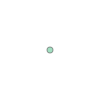

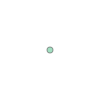

In [75]:

# help(zipcode)

In [80]:
gdf_locations['f_lat'].describe()

count     156900
unique     73611
top          nan
freq        7718
Name: f_lat, dtype: object

In [108]:
# Cleaning
import h3
from shapely.geometry import Point
from uszipcode import SearchEngine
import numpy as np

engine = SearchEngine(simple_or_comprehensive=SearchEngine.SimpleOrComprehensiveArgEnum.comprehensive)

def get_centroid(ziploc, lat, lng, lat_isnull, lng_isnull):
    
    def get_point_from_zip(code):
        zipcode = engine.by_zipcode(code)
        return Point(zipcode.lat, zipcode.lng)
    
    if ziploc == "28":
        return get_point_from_zip(39762)
    elif len(ziploc) == 15:
        lat_lon = h3.h3_to_geo(ziploc)
        return Point(lat_lon[0], lat_lon[1])
    elif len(ziploc) == 5:
        return get_point_from_zip(ziploc)
    
    return None

def get_point(lat, lng):
    return Point(float(lat), float(lng))

gdf_locations['centroid'] = gdf_locations.apply(lambda x: get_centroid(x['f_ziploc']) if pd.isnull(x['f_lat']) or pd.isnull(x['f_lon']) else get_point(x['f_lat'], x['f_lon']), axis=1)

In [109]:
gdf_locations.head(2)

,source,parcel_id,parcel_lat,parcel_lon,parcel_building_footprint,parcel_building_count,poi_lat,poi_lon,secondary_lat,secondary_lon,...,f_lat,f_lon,f_city,primary_loc_id,f_addr1,f_unit,geometry,point,f_zip_latlng,centroid
0,POI,None,nan,nan,None,None,32.364986,-90.145943,nan,nan,...,32.365143,-90.14568,Jackson,4950@@OLD CANTON@RD@&&39211,4950 OLD CANTON RD,nan,POINT (32.36514 -90.14568),POINT (32.370 -90.120),None,POINT (32.365 -90.146)
1,POI,None,nan,nan,None,None,32.389834,-90.110479,nan,nan,...,32.389835,-90.11048,Jackson,6300@@OLD CANTON@RD@&&39211,6300 OLD CANTON RD,nan,POINT (32.38983 -90.11048),POINT (32.370 -90.120),None,POINT (32.390 -90.110)


In [115]:
gdf_locations.isna().sum()

In [111]:
gdf_locations['centroid'].describe()

count          156900
unique          94971
top       POINT EMPTY
freq             7718
Name: centroid, dtype: object

In [105]:
from sklearn.neighbors import BallTree
import numpy as np

def get_nearest(src_points, candidates, k_neighbors=1):
    """Find nearest neighbors for all source points from a set of candidate points"""

    # Create tree from the candidate points
    tree = BallTree(candidates, leaf_size=15, metric='haversine')

    # Find closest points and distances
    distances, indices = tree.query(src_points, k=k_neighbors)

    # Transpose to get distances and indices into arrays
    distances = distances.transpose()
    indices = indices.transpose()

    # Get closest indices and distances (i.e. array at index 0)
    # note: for the second closest points, you would take index 1, etc.
    closest = indices[0]
    closest_dist = distances[0]

    # Return indices and distances
    return (closest, closest_dist)


def nearest_neighbor(left_gdf, right_gdf, return_dist=False):
    """
    For each point in left_gdf, find closest point in right GeoDataFrame and return them.
    
    NOTICE: Assumes that the input Points are in WGS84 projection (lat/lon).
    """
    
    left_geom_col = 'centroid'
    right_geom_col = 'centroid' # right_gdf.geometry.name
    
    # Ensure that index in right gdf is formed of sequential numbers
    right = right_gdf.copy().reset_index(drop=True)
    
    # Parse coordinates from points and insert them into a numpy array as RADIANS
    # Notice: should be in Lat/Lon format 
    left_radians = np.array(left_gdf[left_geom_col].apply(lambda geom: (geom.y * np.pi / 180, geom.x * np.pi / 180)).to_list())
    right_radians = np.array(right[right_geom_col].apply(lambda geom: (geom.y * np.pi / 180, geom.x * np.pi / 180)).to_list())
    
    # Find the nearest points
    # -----------------------
    # closest ==> index in right_gdf that corresponds to the closest point
    # dist ==> distance between the nearest neighbors (in meters)
    
    closest, dist = get_nearest(src_points=left_radians, candidates=right_radians)

    # Return points from right GeoDataFrame that are closest to points in left GeoDataFrame
    closest_points = right.loc[closest]
    
    # Ensure that the index corresponds the one in left_gdf
    closest_points = closest_points.reset_index(drop=True)
    
    # Add distance if requested 
    if return_dist:
        # Convert to meters from radians
        earth_radius = 6371000  # meters
        closest_points['distance'] = dist * earth_radius
        
    return closest_points

In [106]:
# print(df_ms_buildings.centroid)

In [131]:
# df_ms_buildings.to_file("out/df_ms_buildings.geojson", driver='GeoJSON')
df_ms_buildings.to_csv("df_ms_buildings.csv")

In [132]:
closest_stops.to_csv("closest_stops.csv")

NameError: name 'closest_stops' is not defined

In [133]:
# Find closest public transport stop for each building and get also the distance based on haversine distance 
# Note: haversine distance which is implemented here is a bit slower than using e.g. 'euclidean' metric 
# but useful as we get the distance between points in meters
closest_stops = nearest_neighbor(df_ms_buildings, gdf_locations, return_dist=True)

# And the result looks like ..
closest_stops

,source,parcel_id,parcel_lat,parcel_lon,parcel_building_footprint,parcel_building_count,poi_lat,poi_lon,secondary_lat,secondary_lon,...,f_lon,f_city,primary_loc_id,f_addr1,f_unit,geometry,point,f_zip_latlng,centroid,distance
0,POI,None,nan,nan,None,None,32.13374,-90.758922,nan,nan,...,-90.759415,Utica,18074@@OLD PORT GIBSON@RD@&&39175,18074 OLD PORT GIBSON RD,nan,POINT (32.13367 -90.75942),POINT (32.100 -90.620),None,POINT (32.134 -90.759),1.352719e+07
1,POI,None,nan,nan,None,None,32.13374,-90.758922,nan,nan,...,-90.759415,Utica,18074@@OLD PORT GIBSON@RD@&&39175,18074 OLD PORT GIBSON RD,nan,POINT (32.13367 -90.75942),POINT (32.100 -90.620),None,POINT (32.134 -90.759),1.354635e+07
2,POI,None,nan,nan,None,None,32.13374,-90.758922,nan,nan,...,-90.759415,Utica,18074@@OLD PORT GIBSON@RD@&&39175,18074 OLD PORT GIBSON RD,nan,POINT (32.13367 -90.75942),POINT (32.100 -90.620),None,POINT (32.134 -90.759),1.352982e+07
3,POI,None,nan,nan,None,None,32.13374,-90.758922,nan,nan,...,-90.759415,Utica,18074@@OLD PORT GIBSON@RD@&&39175,18074 OLD PORT GIBSON RD,nan,POINT (32.13367 -90.75942),POINT (32.100 -90.620),None,POINT (32.134 -90.759),1.352981e+07
4,POI,None,nan,nan,None,None,32.13374,-90.758922,nan,nan,...,-90.759415,Utica,18074@@OLD PORT GIBSON@RD@&&39175,18074 OLD PORT GIBSON RD,nan,POINT (32.13367 -90.75942),POINT (32.100 -90.620),None,POINT (32.134 -90.759),1.352984e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136949,POI,None,nan,nan,None,None,32.13374,-90.758922,nan,nan,...,-90.759415,Utica,18074@@OLD PORT GIBSON@RD@&&39175,18074 OLD PORT GIBSON RD,nan,POINT (32.13367 -90.75942),POINT (32.100 -90.620),None,POINT (32.134 -90.759),1.355425e+07
136950,POI,None,nan,nan,None,None,32.13374,-90.758922,nan,nan,...,-90.759415,Utica,18074@@OLD PORT GIBSON@RD@&&39175,18074 OLD PORT GIBSON RD,nan,POINT (32.13367 -90.75942),POINT (32.100 -90.620),None,POINT (32.134 -90.759),1.355465e+07
136951,POI,None,nan,nan,None,None,32.13374,-90.758922,nan,nan,...,-90.759415,Utica,18074@@OLD PORT GIBSON@RD@&&39175,18074 OLD PORT GIBSON RD,nan,POINT (32.13367 -90.75942),POINT (32.100 -90.620),None,POINT (32.134 -90.759),1.355961e+07
136952,POI,None,nan,nan,None,None,32.13374,-90.758922,nan,nan,...,-90.759415,Utica,18074@@OLD PORT GIBSON@RD@&&39175,18074 OLD PORT GIBSON RD,nan,POINT (32.13367 -90.75942),POINT (32.100 -90.620),None,POINT (32.134 -90.759),1.354911e+07


In [ ]:
from keplergl import KeplerGl
map_1 = KeplerGl(data={"data_1": ms_hinds_locations[["f_lat", "f_lon"]]})
map_1